# Kmeans Class

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cv2
import os

np.random.seed(42)

class KMeans:
    def __init__(self, K=5, max_iters=100, plot=False):
        self.K = K
        self.max_iters = max_iters
        self.plot = plot
        self.mean = []
        self.num_samples, self.num_features = 0, 0
  
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    
    def _initialize_centroids(self, X):

        # 1
        # for _ in range(self.K):
        #     centroid = X[np.random.choice(range(self.num_samples))]
        #     self.centroids.append(centroid)
        
        # 2
            # for _ in range(self.K):
            #     centroid = X[np.random.choice(self.num_samples, replace=False)]
            #     self.centroids.append(centroid)
        
        # 3 - MAIN    
        random_sample_idxs = np.random.choice(self.num_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.num_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, point in enumerate(self.X):
            closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))
            clusters[closest_centroid].append(idx)    
        return clusters

    def _new_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[idx] = cluster_mean
        return centroids

    def fit(self, X):
        self.X = X
        self.num_samples, self.num_features = X.shape
        # print(f"num_samples: {self.num_samples}")
        # print(f"range um_samples: {range(self.num_samples)}")

        # initialize
        self._initialize_centroids(X)
        
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot:
                self._plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._new_centroids(self.clusters)

            # check if clusters have changed
            diff = self.centroids - centroids_old
            if not diff.any():
                break
                        
            if self.plot:
                self._plot()
                
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()
        
    def _plot_(self, X, Y):
        fig = px.scatter(X[:, 0], X[:, 1], color=Y)
        fig.show()

    def _mean(self, X):
        dist_t = []
        for i in range(len(self.centroids)):
            dist = []
            for j in self.clusters[i]:
                dis = np.sqrt(np.sum((X[j] - self.centroids[i])**2))
                dist.append(dis)
            dist_t.append(dist)
            self.mean.append(np.mean(dist_t[i])) 
        return self.mean
    
    def _mean_total(self, X):
        mean = self._mean(X)
        print("____________________Check____________________")
        print(f"mean:\n{mean}")
        print(f"Length of mean:\n{len(mean)}")
        return np.mean(mean)

    
    
    
def error_plot(X, max_cluster=15):
    error = [0]
    
    for i in range(max_cluster):
        k = KMeans(K=i+1, max_iters=100, plot=False)
        k.fit(X)
        error.append(k._mean_total(X))
    plt.plot([*range(0,max_cluster+1,1)], error)



# Test

(400, 2)
5


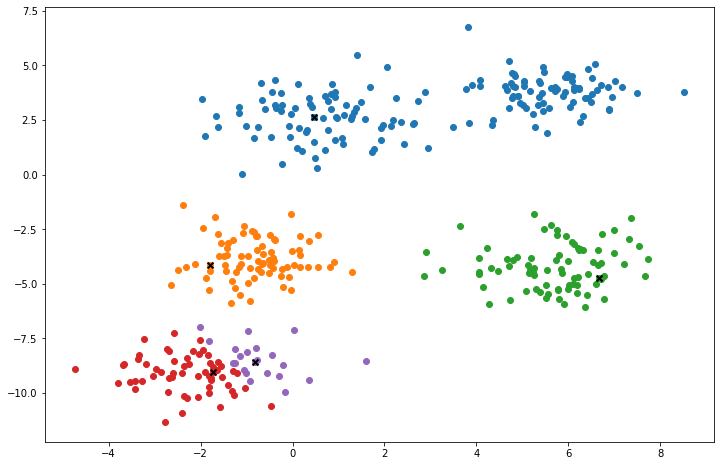

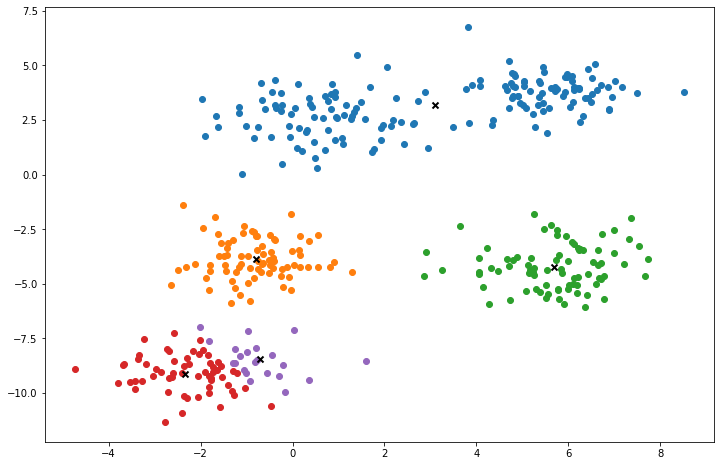

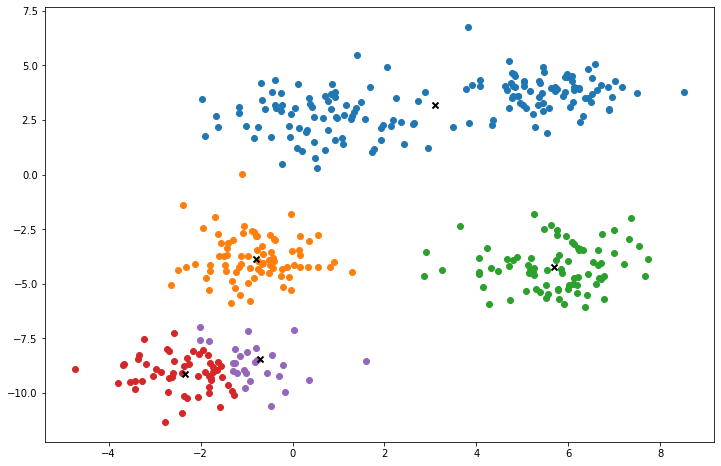

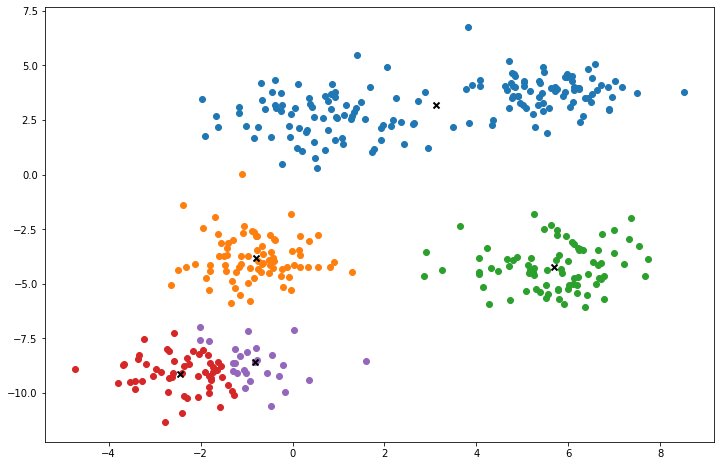

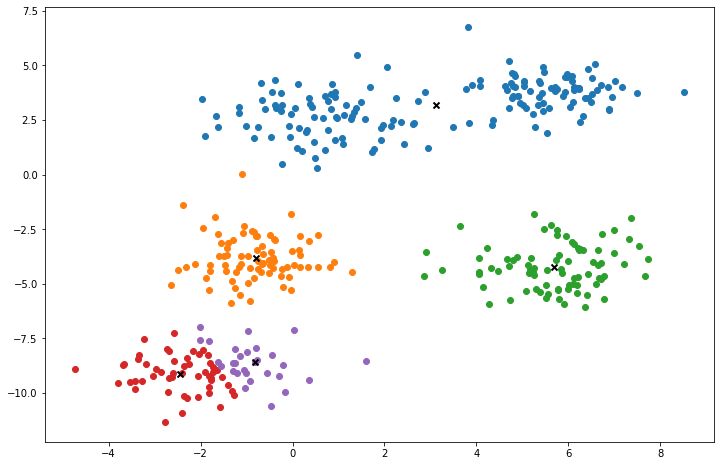

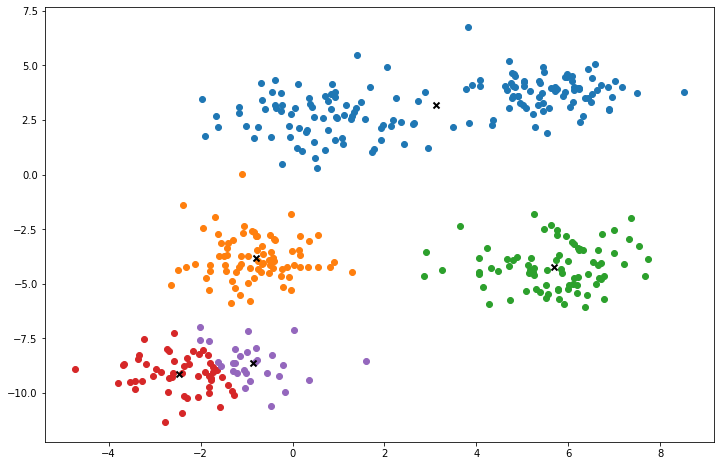

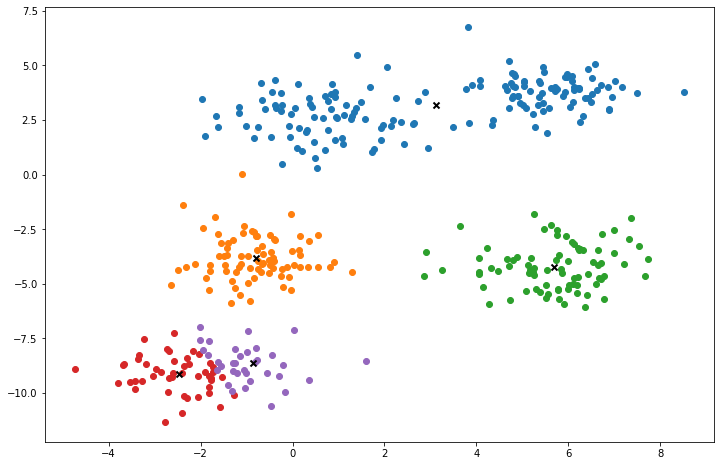

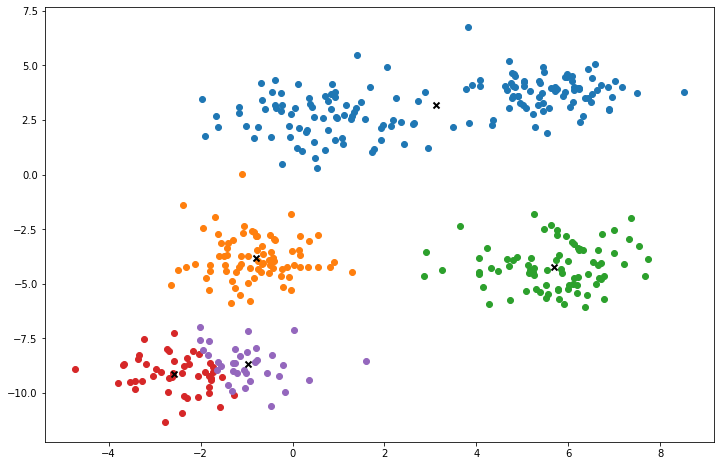

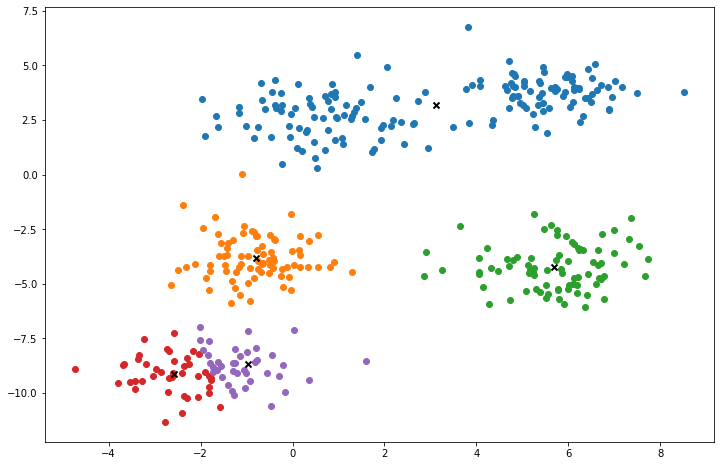

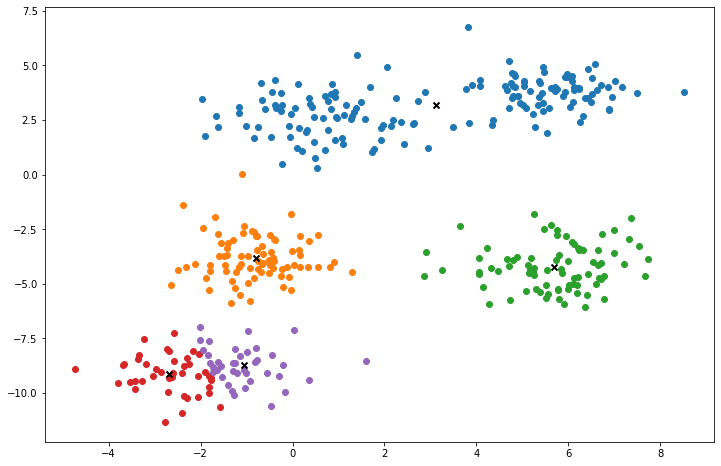

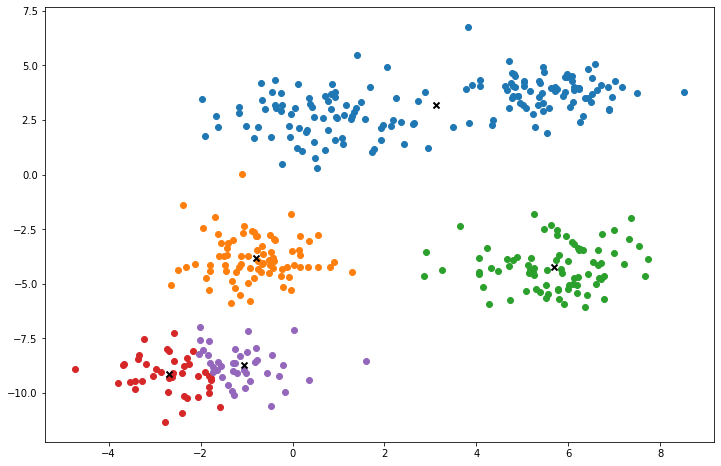

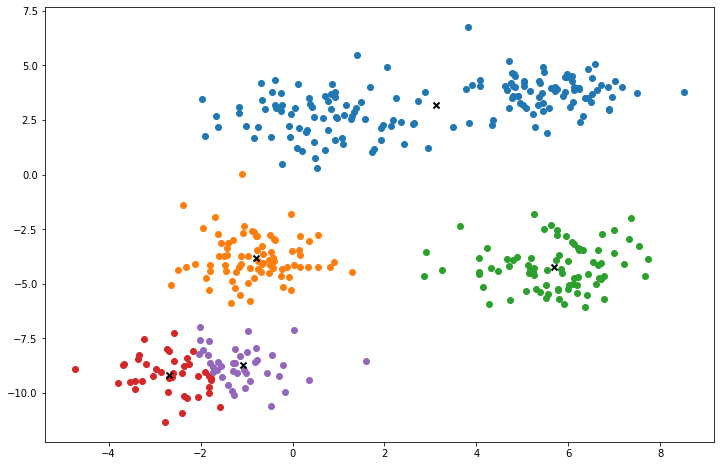

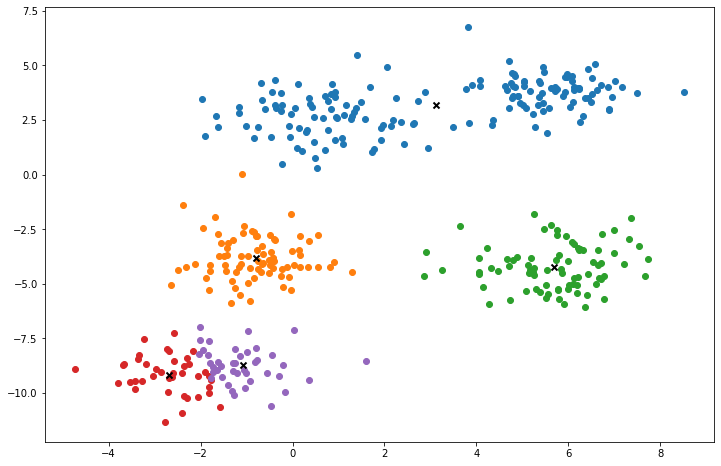

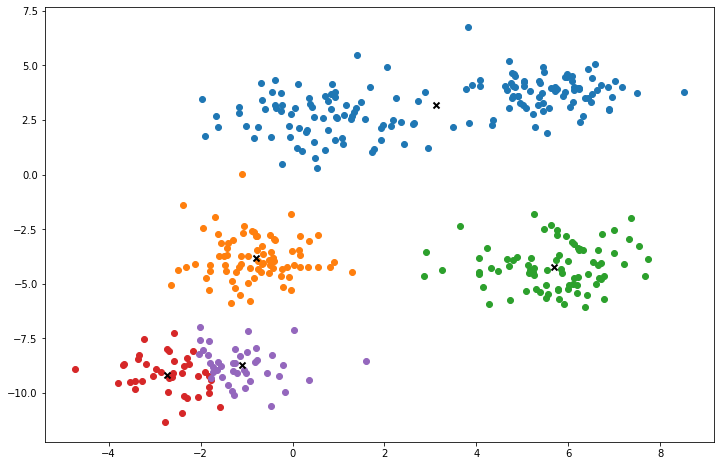

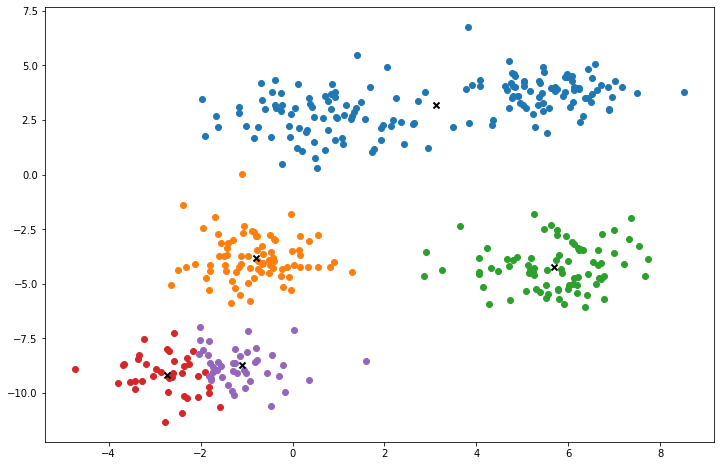

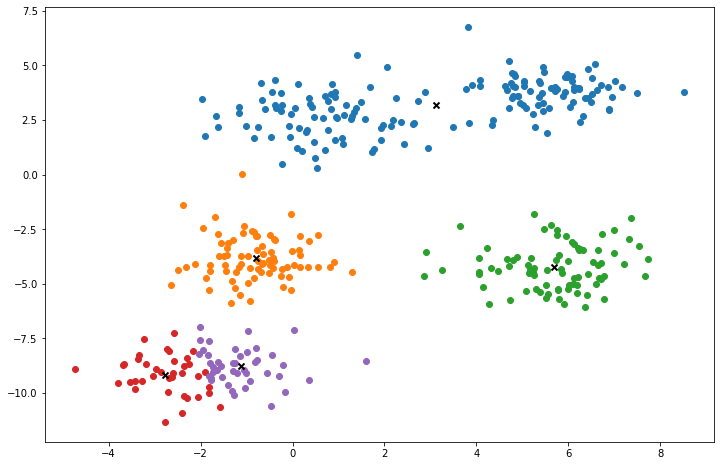

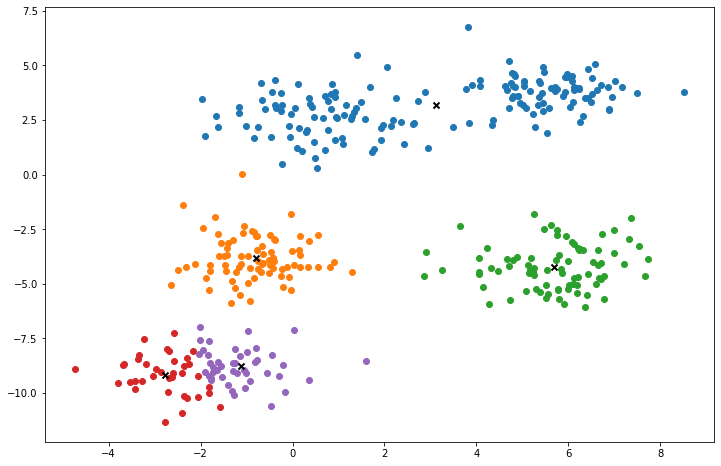

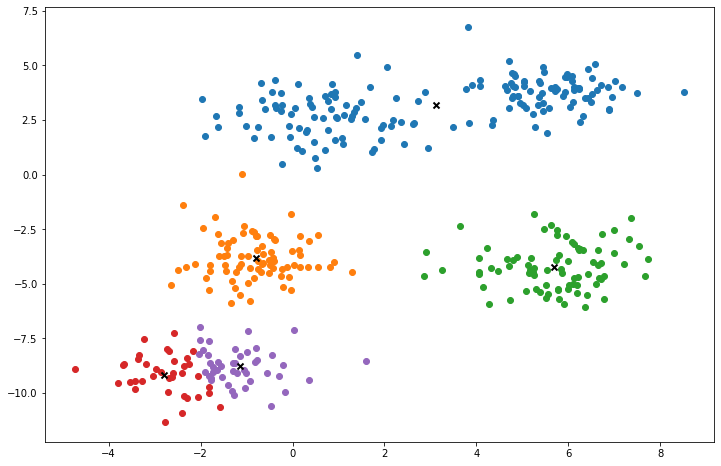

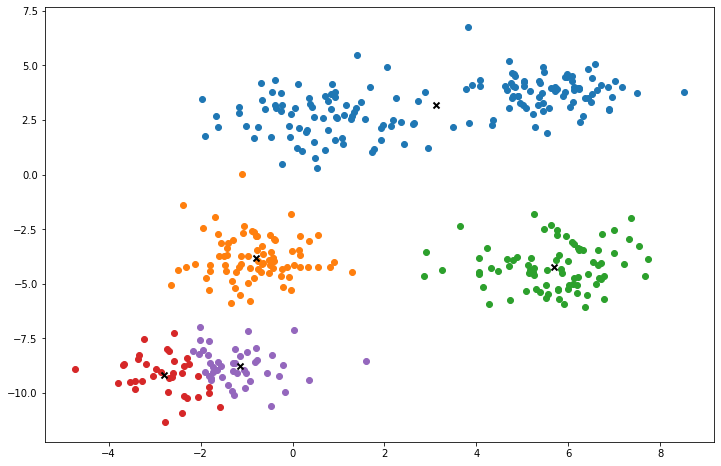

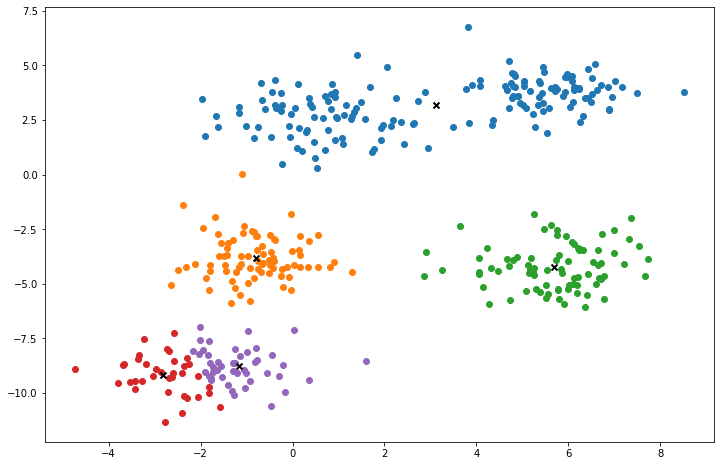

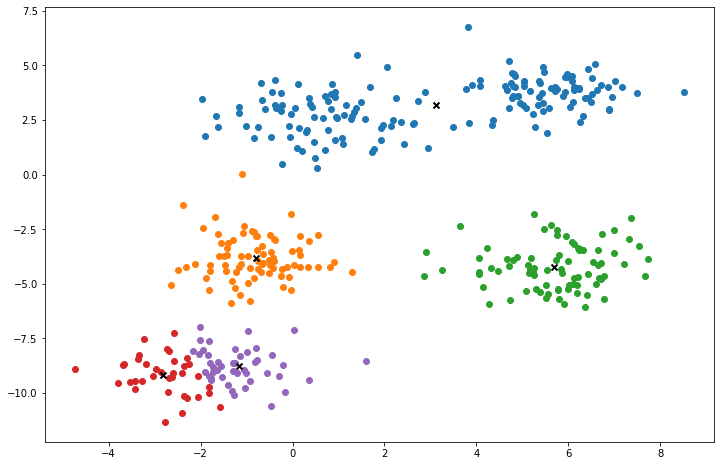

____________________final plot____________________


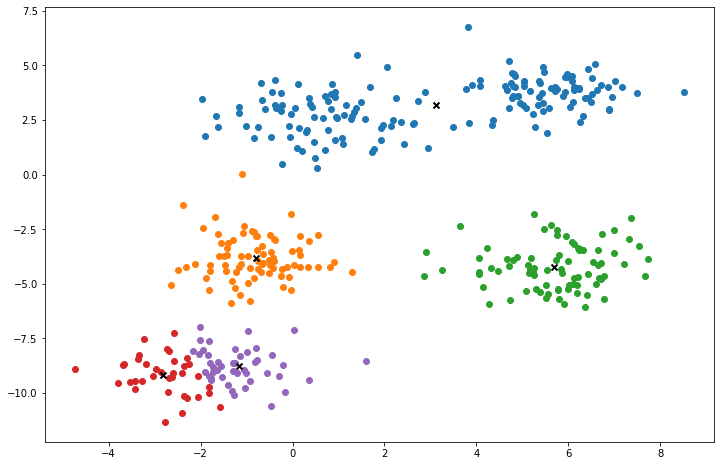

____________________Error plot____________________
____________________Check____________________
mean:
[5.550042545506923]
Length of mean:
1
____________________Check____________________
mean:
[2.796581747511817, 4.033083491946487]
Length of mean:
2
____________________Check____________________
mean:
[2.7684082454044545, 1.3059253465687968, 2.7311069995746826]
Length of mean:
3
____________________Check____________________
mean:
[1.3059253465687968, 2.7145557851861013, 1.2031769868532838, 1.1038371368362259]
Length of mean:
4
____________________Check____________________
mean:
[1.408747091867062, 1.3059253465687968, 1.0657663263883697, 1.2031769868532838, 1.0638876952217475]
Length of mean:
5
____________________Check____________________
mean:
[1.0657663263883697, 1.3059253465687968, 1.2031769868532838, 1.3143649905560397, 1.2168739609955823, 0.8840153442597207]
Length of mean:
6
____________________Check____________________
mean:
[1.07877808385329, 0.8903623202347721, 1.19785988676055

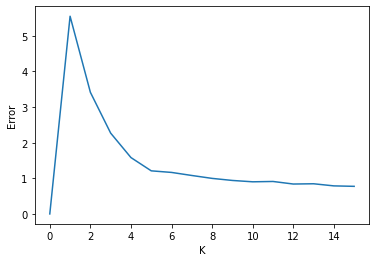

In [35]:
# Testing
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=5, n_samples=400, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape), 
    
    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot=True)
    y_pred = k.fit(X)
    
    # plot
    print("____________________final plot____________________")
    k._plot_(X, k._get_cluster_labels(k.clusters))
    k._plot()
    
    # ploting Error 
    print("____________________Error plot____________________")
    error_plot(X, max_cluster=15)
    plt.xlabel('K')
    plt.ylabel('Error')


# Compressing Image

In [6]:
# GIGA chad xD

pic = cv2.imread("./assets/giga_chad.png").astype(np.int32)

# pic_ = pic.reshape(pic.shape[0] * pic.shape[1],3)
pic_ = pic.reshape(-1, 3)
compressed_pic = pic_

k = KMeans(K=2, max_iters=100, plot=False)
k.fit(pic_)

for i in range(len(k.centroids)):
    compressed_pic[k.clusters[i]] = k.centroids[i]

compressed_pic = np.clip(compressed_pic.astype('uint8'), 0, 255)
compressed_pic = compressed_pic.reshape(pic.shape[0], pic.shape[1], 3)

cv2.imwrite(os.path.join("./assets", "chad_compressed.png"), compressed_pic)


KeyboardInterrupt: 

In [7]:
# Ladybug

pic = cv2.imread("./assets/ladybug.png").astype(np.int32)

# pic = pic.reshape(pic.shape[0] * pic.shape[1],3)
pic_ = pic.reshape(-1, 3)
compressed_pic = pic_

k = KMeans(K=16, max_iters=100, plot=False)
k.fit(pic_)

for i in range(len(k.centroids)):
    compressed_pic[k.clusters[i]] = k.centroids[i]

compressed_pic = np.clip(compressed_pic.astype('uint8'), 0, 255)
compressed_pic = compressed_pic.reshape(pic.shape[0], pic.shape[1], 3)

cv2.imwrite(os.path.join("./assets", "ladybug_k16.png"), compressed_pic)


True

# Mall_Customers Dataset

In [7]:
import pandas as pd

ds = pd.read_csv("./assets/Mall_Customers.csv")
ds = ds.iloc[:,3:]
ds.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
ds.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


## Shuffling

In [9]:
ds = ds.sample(frac=1.).reset_index(drop=True)
ds.head()

,Annual Income (k$),Spending Score (1-100)
0,20,77
1,78,78
2,63,48
3,54,44
4,54,52


## Splitting data into "train" and "test" parts

In [10]:
train = ds.sample(frac=0.8).reset_index(drop=True)
test = ds.drop(index=train.index).reset_index(drop=True)

print(f"{type(ds)}\n")
print(f"train shape:\n{train.shape}\n{type(train)}\n\n")
print(f"test shape:\n{test.shape}\n{type(test)}")

<class 'pandas.core.frame.DataFrame'>

train shape:
(160, 2)
<class 'pandas.core.frame.DataFrame'>


test shape:
(40, 2)
<class 'pandas.core.frame.DataFrame'>


## Normalization

In [11]:
mean_x = train.mean()
std_x = train.std()
mean_ds = ds.mean()
std_ds = ds.std()


train_n = (train - mean_x) / std_x
test_n = (test - mean_x) / std_x
ds_n = (ds - mean_ds) / std_ds

In [12]:
print(f"x_train_n shape:\n{train_n.shape}\n{type(train_n)}\n\n")
print(f"ds_n shape:\n{ds_n.shape}\n{type(ds_n)}\n\n")


x_train_n shape:
(160, 2)
<class 'pandas.core.frame.DataFrame'>


ds_n shape:
(200, 2)
<class 'pandas.core.frame.DataFrame'>




## Converting to np array and reshaping

In [13]:
train = np.array(train)
test = np.array(test)
ds = np.array(ds)
train_n = np.array(train_n)
test_n = np.array(test_n)
ds_n = np.array(ds_n)
# For (#, ) to make it (#, 1) for good indexing
print(train.shape)
print(len(train))
print(test_n.shape)
print(len(test))
print(train_n)

(160, 2)
160
(40, 2)
40
[[-0.81849133 -0.51368308]
 [-0.39653915 -0.03196044]
 [-0.01294626 -0.10607162]
 [ 0.67752095 -1.03246131]
 [ 1.40634744  1.3390963 ]
 [-1.20208423 -0.69896102]
 [ 1.02275455 -1.47712836]
 [ 0.17885019  0.00509514]
 [ 0.06377232 -0.06901603]
 [-0.243102   -0.32840515]
 [-1.35552138 -1.6624063 ]
 [-0.78013205 -0.29134956]
 [-1.04864707  1.15381836]
 [-0.54997631  0.04215073]
 [ 0.02541303 -0.03196044]
 [-1.24044352  0.41270661]
 [ 0.17885019 -0.25429397]
 [ 0.71588024 -0.55073867]
 [ 0.52408379 -1.47712836]
 [-0.05130555 -0.32840515]
 [ 1.02275455 -1.3659616 ]
 [ 0.25556876  0.22742867]
 [ 1.44470673  1.41320748]
 [-1.54731783 -1.29185043]
 [ 0.56244308 -1.6624063 ]
 [-0.243102    0.19037308]
 [-1.24044352  1.19087395]
 [ 0.98439526  1.67259659]
 [-0.81849133  0.41270661]
 [ 0.63916166  0.89442925]
 [ 1.02275455  0.93148484]
 [-0.47325773 -0.06901603]
 [-1.01028778  0.85737366]
 [ 0.67752095 -1.81062865]
 [-1.39388067  0.85737366]
 [ 2.02009607 -1.55123954]
 [-0

## Mall Customer Prediction

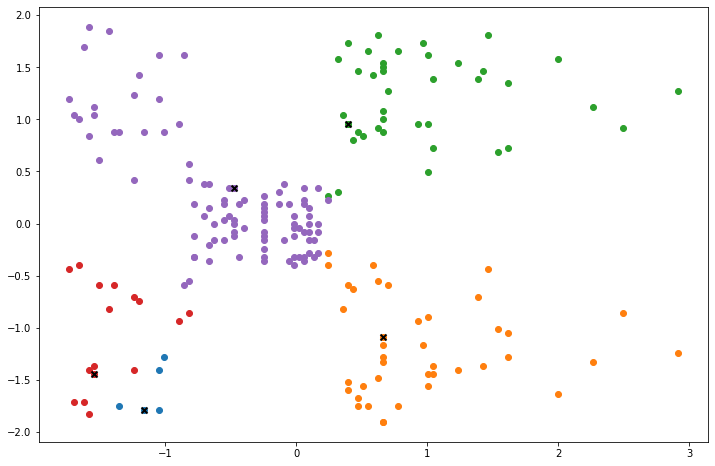

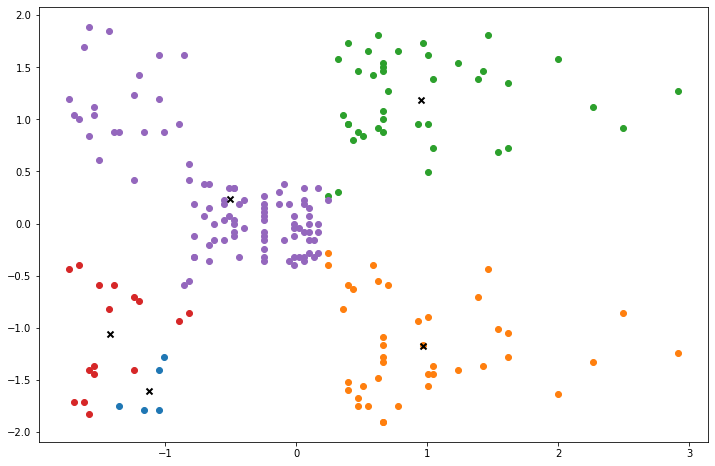

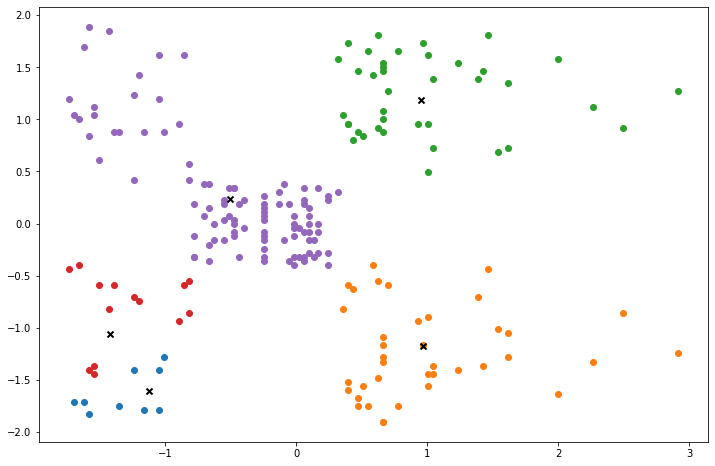

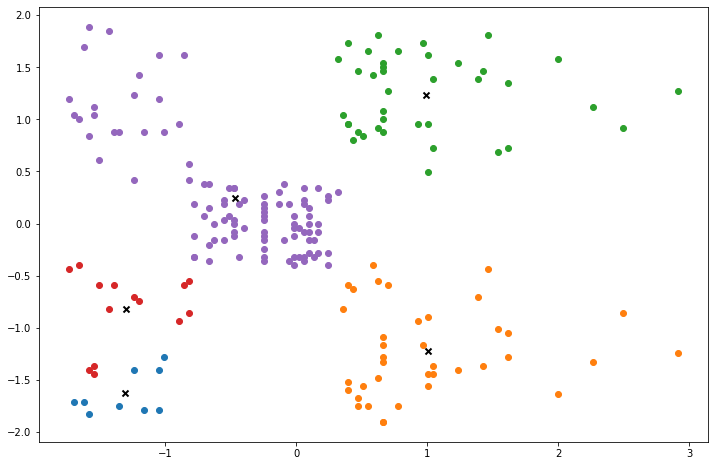

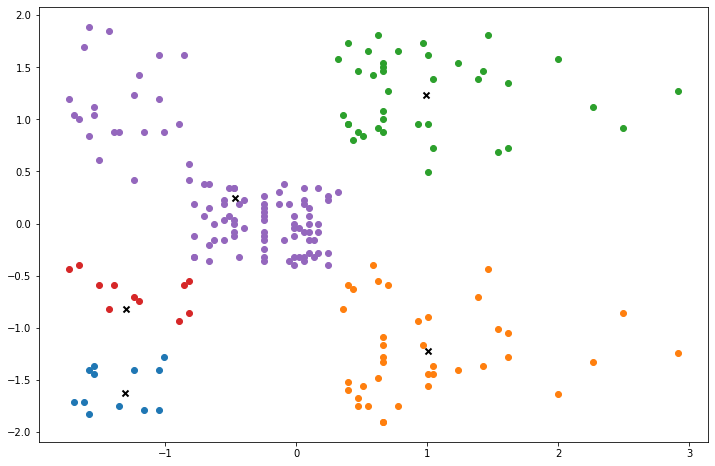

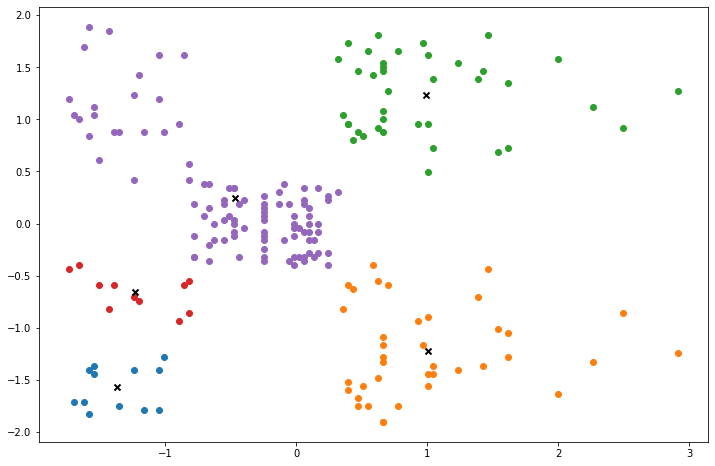

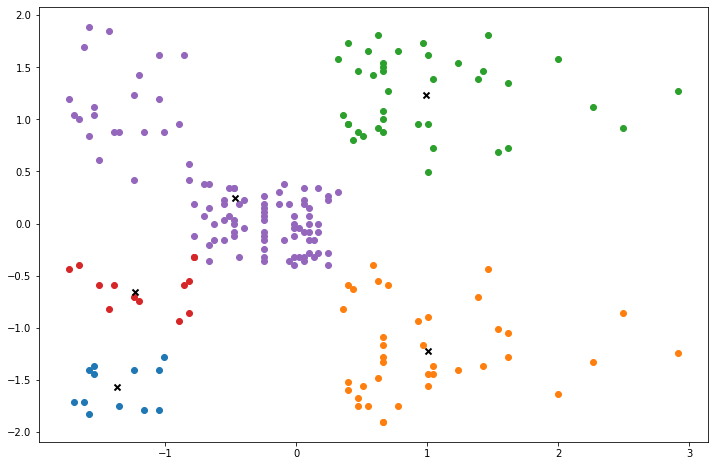

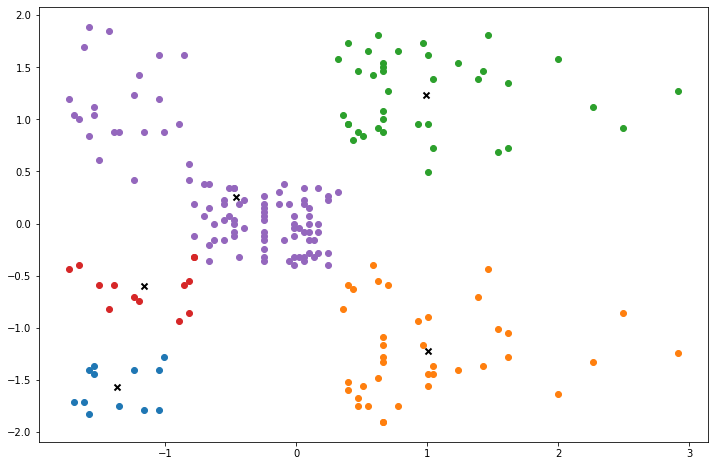

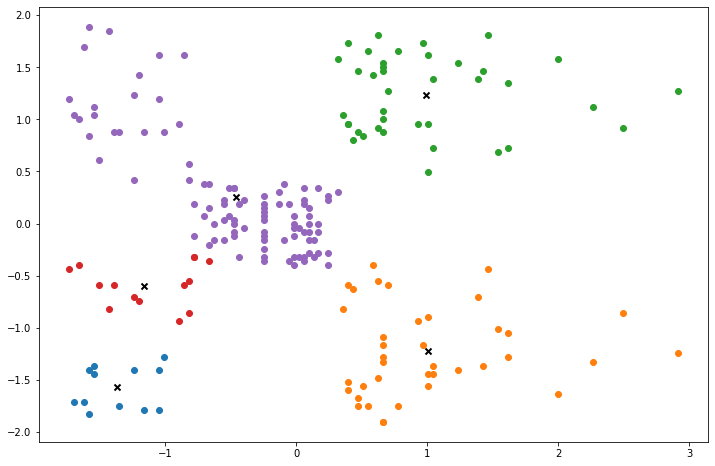

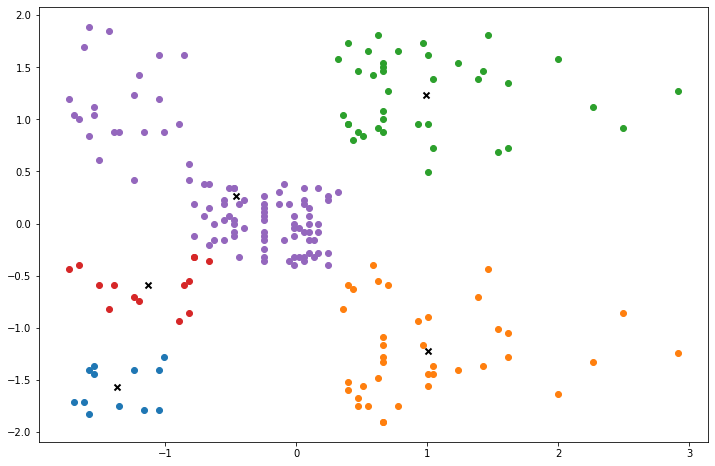

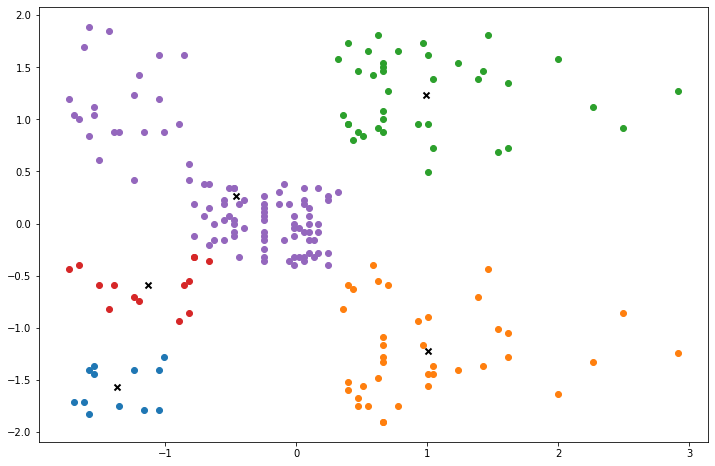

array([4., 2., 4., 4., 4., 3., 4., 4., 1., 3., 4., 0., 4., 2., 4., 4., 4.,
       4., 4., 0., 4., 4., 2., 4., 1., 4., 4., 2., 1., 1., 1., 2., 2., 3.,
       4., 3., 1., 4., 4., 0., 4., 2., 1., 4., 0., 1., 4., 4., 1., 2., 4.,
       2., 4., 4., 2., 4., 1., 4., 0., 4., 4., 2., 4., 1., 4., 0., 4., 2.,
       0., 1., 1., 4., 4., 4., 1., 4., 4., 4., 2., 3., 1., 4., 4., 2., 3.,
       4., 4., 4., 1., 4., 4., 2., 3., 4., 1., 4., 4., 1., 3., 4., 1., 4.,
       3., 1., 4., 2., 4., 2., 4., 4., 1., 2., 4., 1., 1., 1., 4., 1., 4.,
       2., 4., 4., 4., 4., 4., 1., 4., 4., 2., 0., 4., 4., 1., 3., 2., 1.,
       4., 2., 4., 0., 1., 4., 0., 2., 1., 1., 3., 4., 4., 1., 0., 4., 2.,
       1., 4., 4., 4., 2., 0., 2., 4., 4., 2., 2., 4., 2., 3., 4., 4., 3.,
       1., 2., 4., 4., 4., 2., 4., 2., 4., 2., 2., 2., 2., 3., 4., 4., 1.,
       4., 4., 1., 4., 4., 4., 4., 2., 2., 1., 4., 1., 2.])

In [14]:
k1 = KMeans(K=5, max_iters=100, plot=True)
k1.fit(ds_n)

In [33]:
lst_sum = np.sum(k1.centroids, axis=1)
lst_max_idx = np.argmax(np.asarray(lst_sum))
print(lst_sum)
print(lst_max_idx)
k1.centroids[lst_max_idx]
k1.clusters[lst_max_idx]
print(ds[k1.clusters[lst_max_idx]])
flag = ds[k1.clusters[lst_max_idx]]


[-2.94262695 -0.21579415  2.2255011  -1.71402826 -0.19882934]
2
[[ 78  78]
 [ 77  74]
 [ 73  73]
 [ 75  93]
 [ 74  72]
 [ 87  63]
 [ 71  95]
 [137  83]
 [ 98  88]
 [126  74]
 [ 87  75]
 [ 88  69]
 [ 78  89]
 [ 73  88]
 [ 72  71]
 [ 86  95]
 [ 78  88]
 [ 76  87]
 [103  85]
 [ 71  75]
 [ 78  73]
 [ 71  75]
 [ 97  86]
 [113  91]
 [101  68]
 [ 85  75]
 [ 99  97]
 [ 81  93]
 [103  69]
 [ 69  91]
 [ 70  77]
 [ 77  97]
 [120  79]
 [ 93  90]
 [ 79  83]
 [ 78  76]
 [ 87  92]
 [ 88  86]
 [ 78  90]]


## Plotting

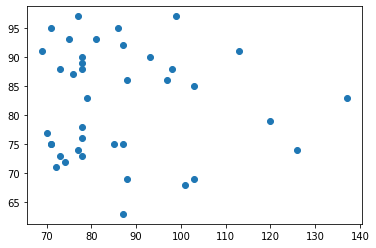

In [13]:
index = []
value = []
for x,y in flag:
    index.append(x)
    value.append(y)
"""
    Selected customers
"""
plt.scatter(index, value)